In [10]:
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import gmaps

# Gmaps API Keys
from config import gkey

df = pd.read_csv("Output/cleaned_venue_data2.csv")
df.count()

Neighborhood              1226
Neighborhood Latitude     1226
Neighborhood Longitude    1226
Venue Name                1226
Venue ID                  1226
Venue Category            1226
Venue Latitude            1226
Venue Longitude           1226
Venue City                1106
Venue State               1226
Likes                     1225
Rating                     216
dtype: int64

In [11]:
# 1 - What are the most popular neighborhoods for music venues in Manhattan? 
# rank neighborhoods in by count of venues bar chart

grouped = df.groupby('Neighborhood')
grouped.count()

,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue ID,Venue Category,Venue Latitude,Venue Longitude,Venue City,Venue State,Likes,Rating
Neighborhood,,,,,,,,,,,
Arden Heights,1,1,1,1,1,1,1,1,1,0,0
Arrochar,1,1,1,1,1,1,1,1,1,0,0
Astoria Heights,4,4,4,4,4,4,4,4,4,0,0
Auburndale,7,7,7,7,7,7,7,6,7,7,1
Bath Beach,7,7,7,7,7,7,7,7,7,7,0
Bay Ridge,4,4,4,4,4,4,4,4,4,4,1
Baychester,3,3,3,3,3,3,3,3,3,3,0
Bayside,2,2,2,2,2,2,2,2,2,2,1
Bedford Park,11,11,11,11,11,11,11,9,11,11,0


In [ ]:
# 2 - What are the most popular venues by neighborhood? 



In [6]:
# 3 - Which neighborhoods have the most highly rated/most liked venues? 

# Removing all the rows with none value in first dataframe
cleaned = df.dropna(how="any")

#Grouping by Neighborhood and getting needed columns for new dataframe
grouped_df = cleaned.groupby(["Neighborhood"])
likes = grouped_df["Likes"].mean()
rating = grouped_df["Rating"].mean()
lat = grouped_df["Neighborhood Latitude"].mean()
lon = grouped_df["Neighborhood Longitude"].mean()

#Creating dataframe
summary = pd.DataFrame({
    "Likes":likes,
    "Rating":rating,
    "Latitude": lat,
    "Longitude": lon
})
summary.head()


,Likes,Rating,Latitude,Longitude
Neighborhood,,,,
Astoria Heights,10.0,6.15,40.770317,-73.894680
Bay Ridge,9.0,7.20,40.625801,-74.030621
Bayside,9.0,6.00,40.766041,-73.774274
Bedford Stuyvesant,31.5,6.85,40.687232,-73.941785
Bensonhurst,6.0,6.00,40.611009,-73.995180


<IPython.core.display.Javascript object>


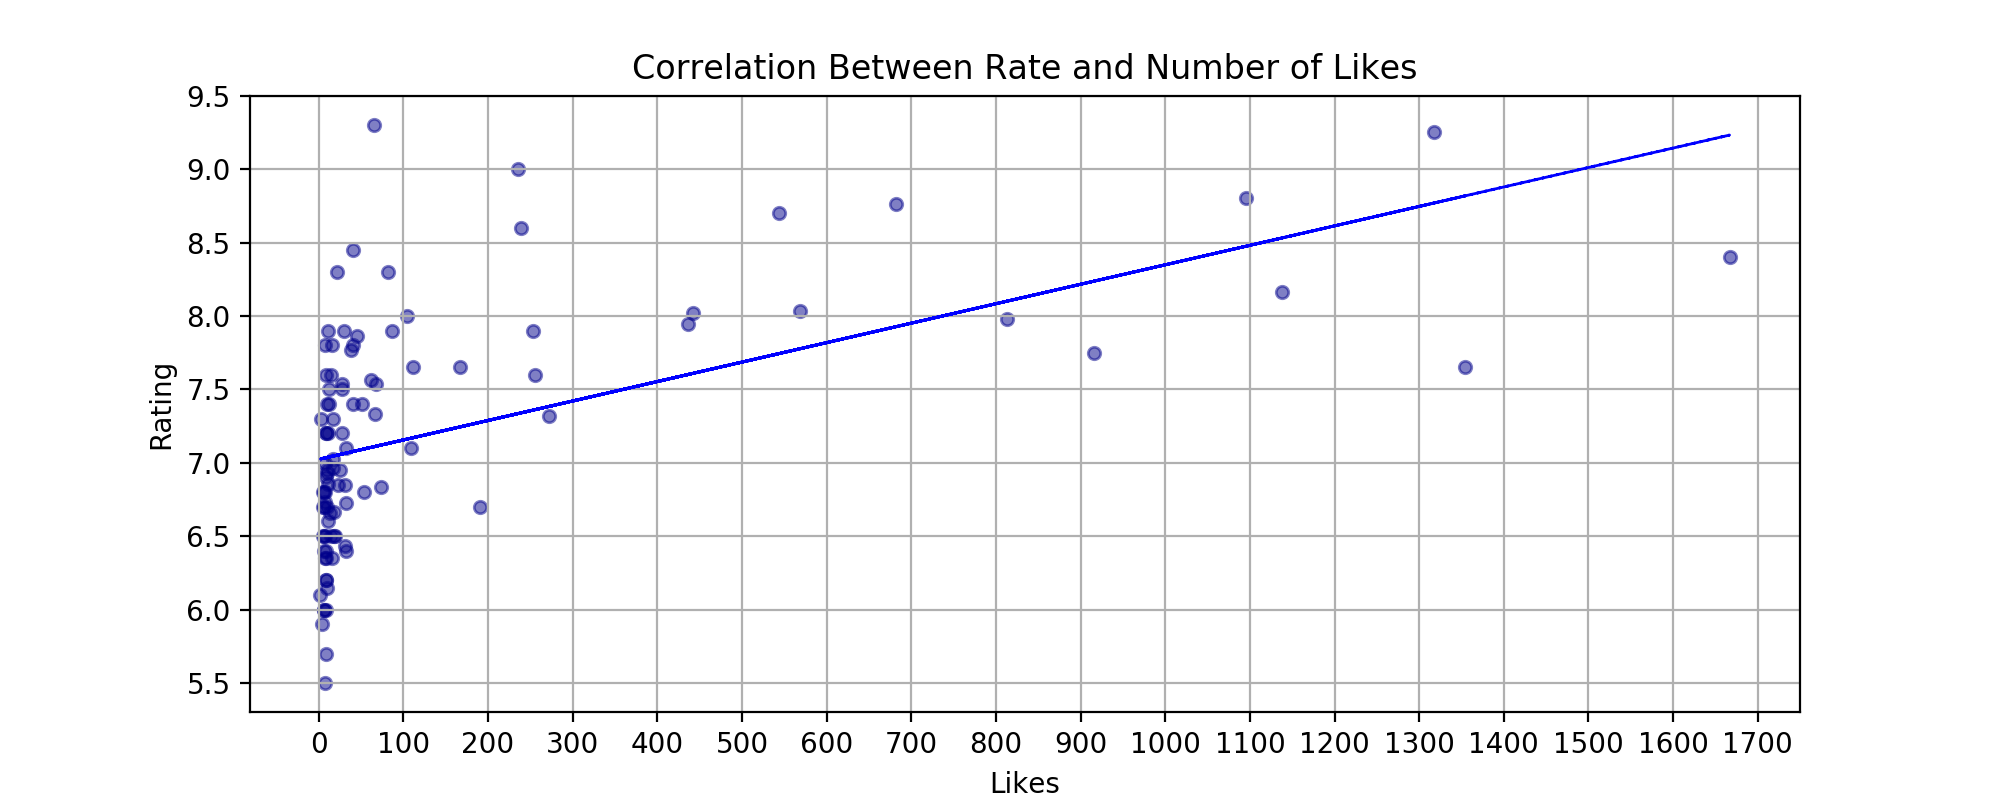

In [7]:
# Line to see the correlation of rates and likes
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(likes, rating)
m_fit = m_slope * likes + m_int

# scatter plot
ax1 = summary.plot.scatter(x='Likes',
                           y='Rating',
                           c='DarkBlue',
                           alpha=0.5,
                           figsize=(10,4),
                           xticks=np.arange(0, 1800, 100),
                           title = "Correlation Between Rate and Number of Likes")
ax1.plot(likes, m_fit, "b--", linewidth=1)
ax1.grid()

<IPython.core.display.Javascript object>


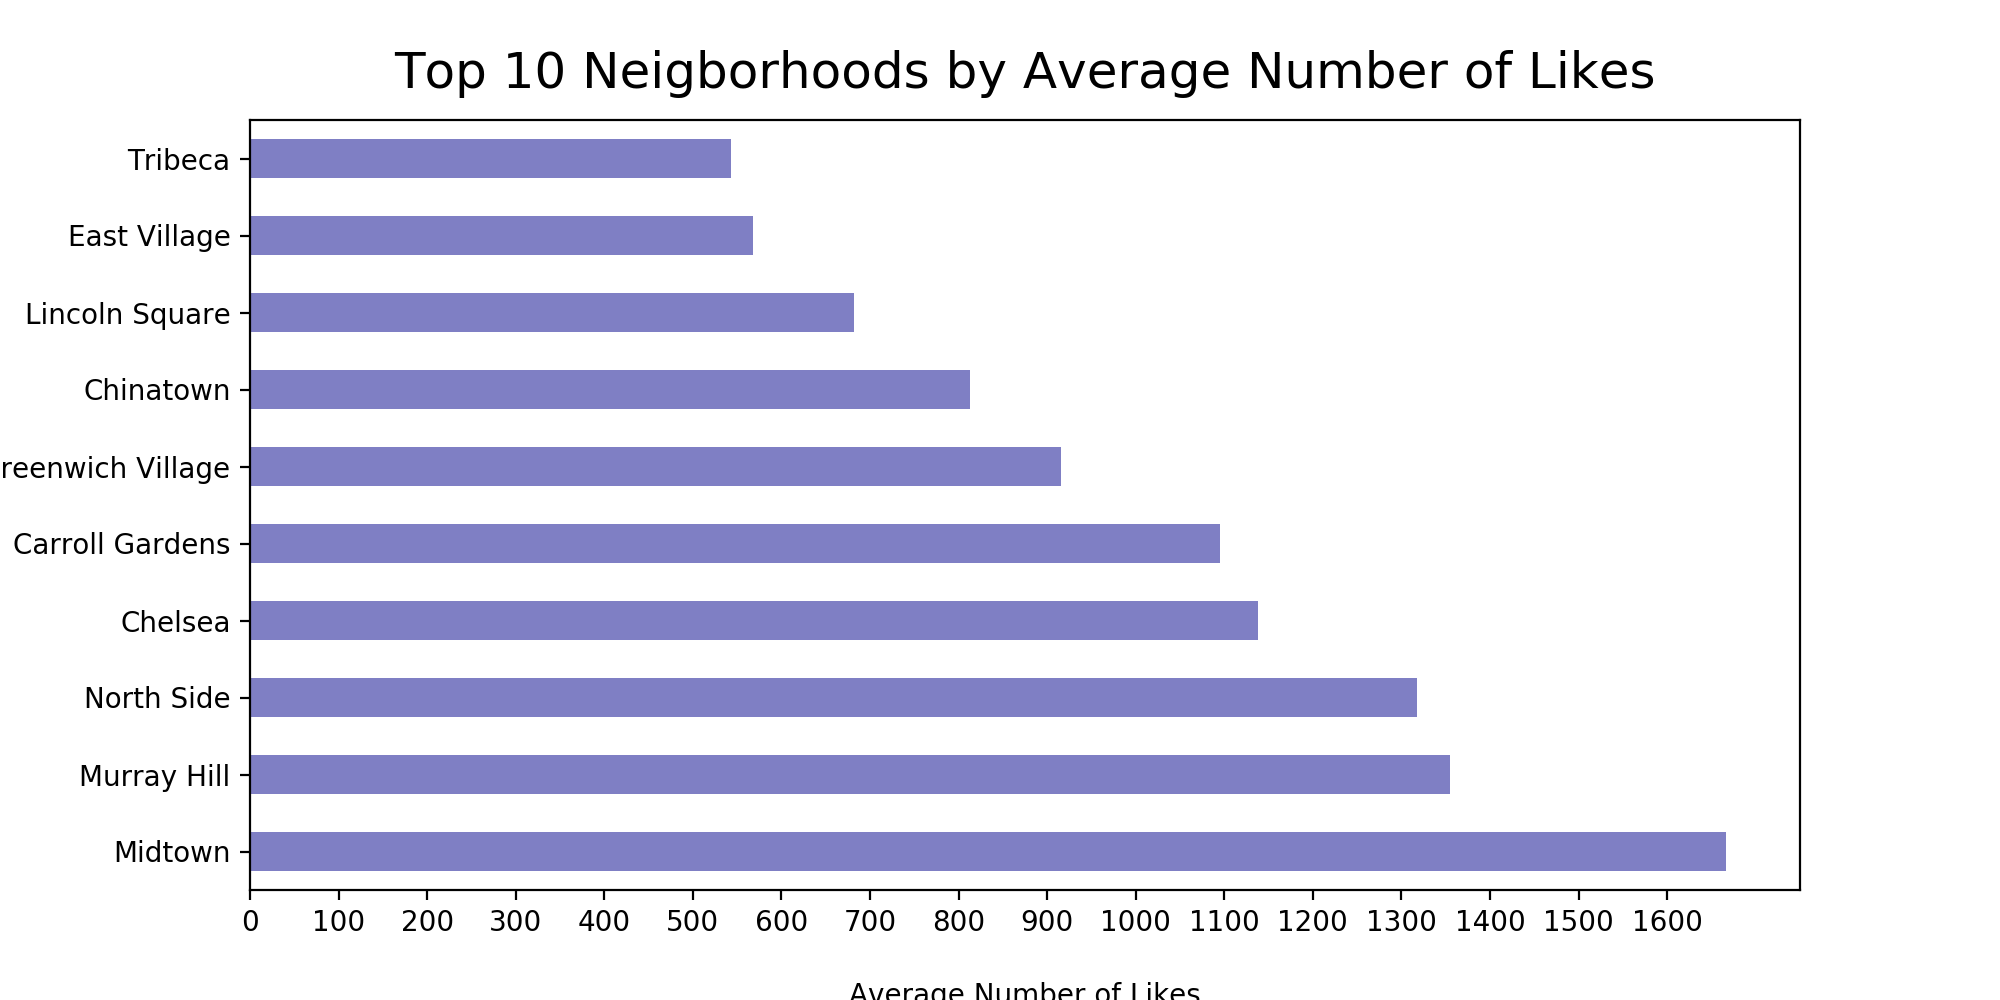

In [8]:
# Sorting dataframe by likes to get top values
sort_likes = summary.sort_values("Likes", ascending=False)

# Creating bar chart
sort_likes["Likes"][:10].plot(kind='barh', color="Darkblue", alpha=0.5, figsize=(10, 5), xticks=np.arange(0, 1700, 100))

plt.xlabel("Average Number of Likes", labelpad=16)
plt.ylabel("Neighborhood", labelpad=16)
plt.title("Top 10 Neigborhoods by Average Number of Likes", y=1.02, fontsize=18)
plt.savefig("Top10bylikes.png")

<IPython.core.display.Javascript object>


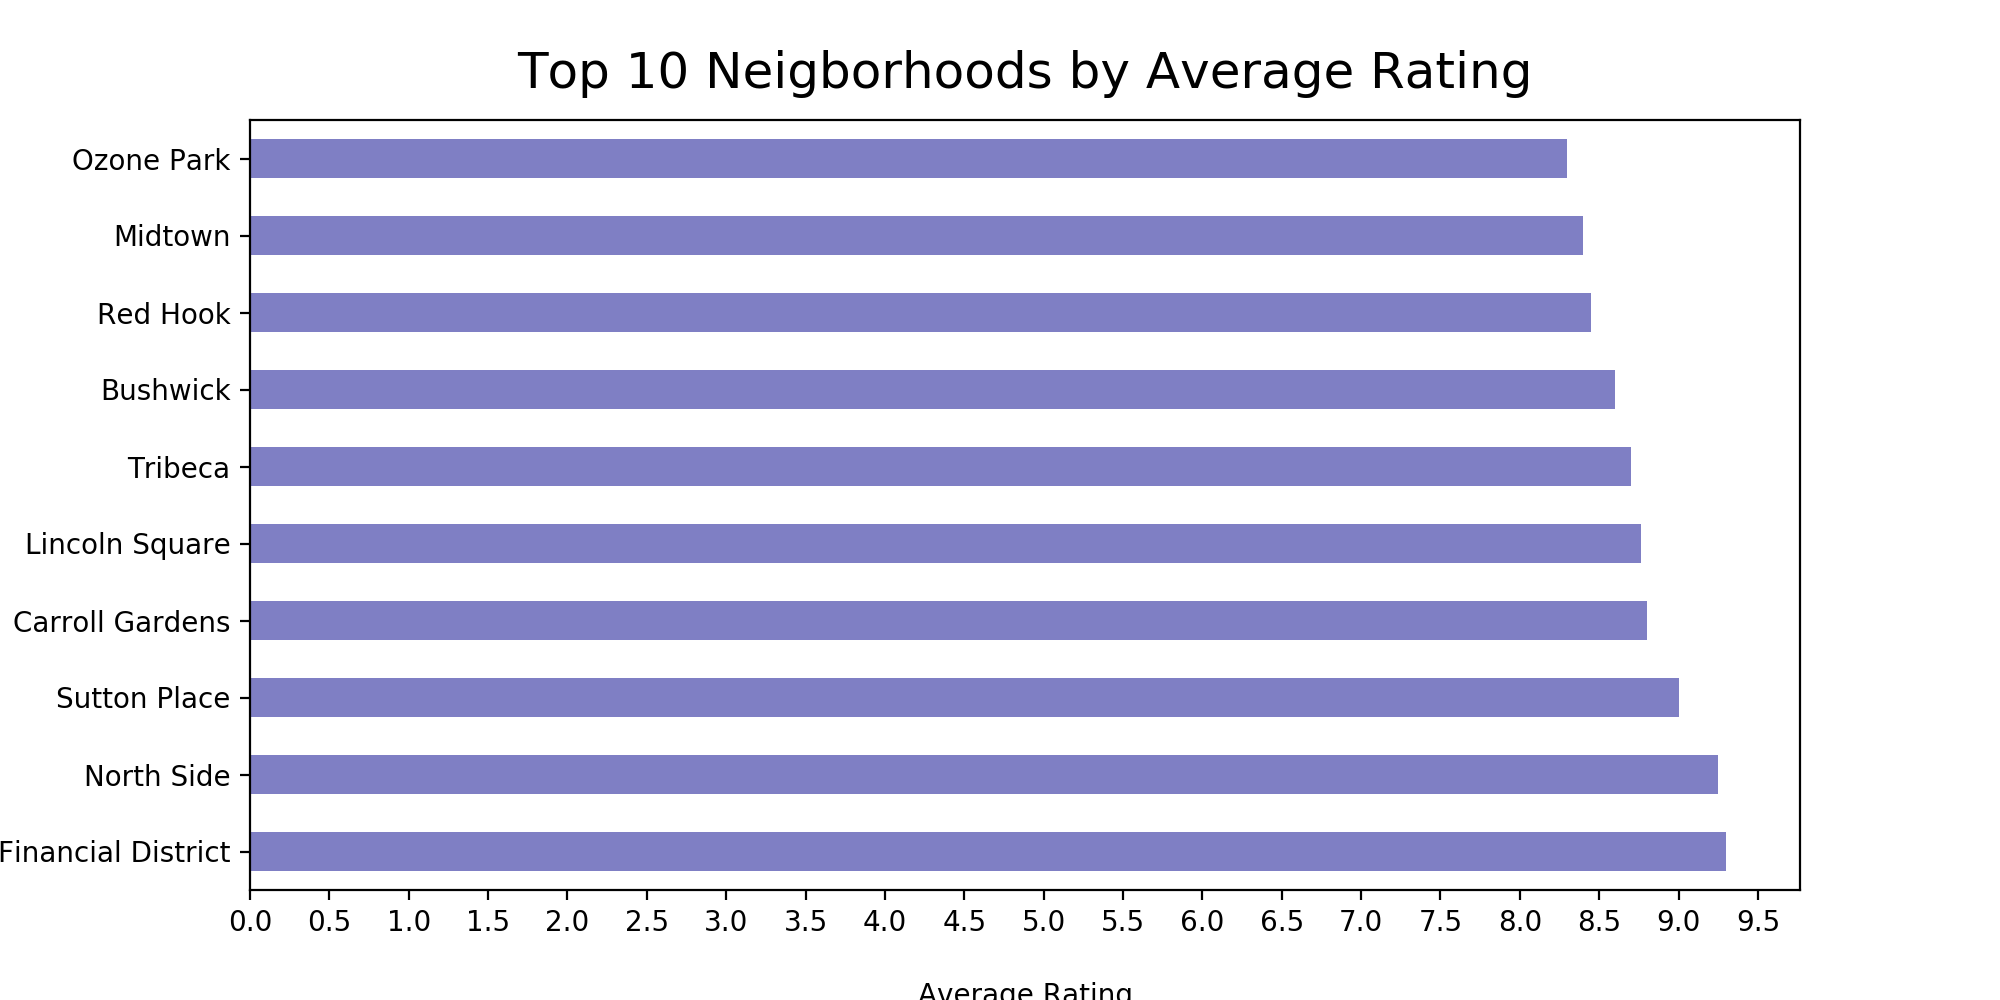

In [9]:
# Sorting by Rating
sort_rate = summary.sort_values("Rating", ascending=False)

# Creating bar chart
sort_rate["Rating"][:10].plot(kind='barh', color="Darkblue", alpha=0.5, figsize=(10, 5), xticks=np.arange(0, 10, 0.5))

plt.xlabel("Average Rating", labelpad=16)
plt.ylabel("Neighborhood", labelpad=16)
plt.title("Top 10 Neigborhoods by Average Rating", y=1.02, fontsize=18)

plt.savefig("Top10byrate.png")

In [11]:
# Creating a dataframe that holds the information about number of musical venues by neighborhoods
grouped_df = df.groupby(["Neighborhood"])
venue_count = grouped_df["Venue Name"].count()
lat = grouped_df["Neighborhood Latitude"].mean()
lon = grouped_df["Neighborhood Longitude"].mean()

df2 = pd.DataFrame({
    "Venue Count":venue_count,
    "Latitude": lat,
    "Longitude": lon
})
df2.head()

,Venue Count,Latitude,Longitude
Neighborhood,,,
Arden Heights,1,40.549286,-74.185887
Arrochar,1,40.596313,-74.067124
Astoria Heights,4,40.770317,-73.894680
Auburndale,7,40.761730,-73.791762
Bath Beach,7,40.599519,-73.998752


In [12]:
# Configure gmaps
gmaps.configure(api_key=gkey)

# Store latitude and longitude in locations
locations = summary[["Latitude","Longitude"]]

# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=summary["Rating"], 
                                 dissipating=False, max_intensity=10,
                                 point_radius=0.013)
# Add layer
fig.add_layer(heat_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))